In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()

In [2]:
googlePlayStore = pd.read_csv('googleplaystore.csv')
googlePlayStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
googlePlayStore = googlePlayStore.dropna()
print(googlePlayStore.shape)
googlePlayStore.head()

(9360, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 1 График
На данном графике расмотрим по каким категориям больше всего приложений

In [ ]:
plotCategory = googlePlayStore.groupby('Category').size().plot(kind='bar')
plotCategory.set_title('Предложение рынка')
plotCategory.set_ylabel('Количество приложений')
plotCategory.set_xlabel('Категория')
plt.show()

## 2 График
Рассмотрим то каких приложений больше всего

In [4]:
topGenres = googlePlayStore.groupby('Genres')[['Rating']].count()\
    .sort_values('Rating', ascending=False).head()
    
topGenres

,Rating
Genres,
Tools,732
Entertainment,533
Education,468
Action,358
Productivity,351


In [5]:
topGenres.style.bar()

,Rating
Genres,
Tools,732
Entertainment,533
Education,468
Action,358
Productivity,351


## 3 График
Спрос рынка

In [ ]:
googlePlayStore['Installs'] = googlePlayStore.Installs.apply(lambda string: string.rstrip('+'))
googlePlayStore['Installs'] = googlePlayStore.Installs.apply(lambda string: string.replace(',',''))

Text(0.5, 0, 'Категория')

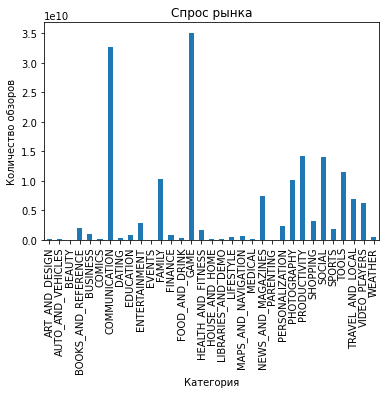

In [16]:
googlePlayStore['Installs'] = googlePlayStore.Installs.astype('int64')
plotMostUseCategory = googlePlayStore.groupby('Category').Installs.sum().plot(kind='bar')
plotMostUseCategory.set_title('Спрос рынка')
plotMostUseCategory.set_ylabel('Количество обзоров')
plotMostUseCategory.set_xlabel('Категория')

## 4 График


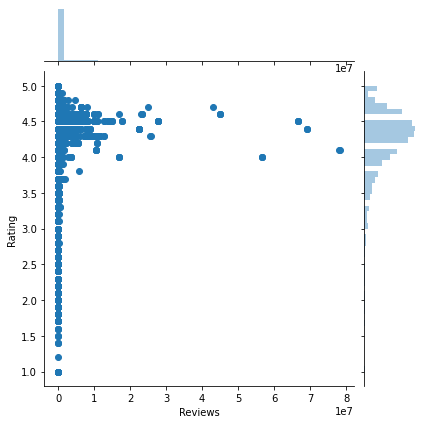

In [22]:
ratAndRev = googlePlayStore[['Rating', 'Reviews']]
sns.jointplot(x='Reviews', y='Rating', 
              data=ratAndRev, kind='scatter')

Вывод: Люди больше оценивают приложения, которые имеют хорошую оценку. Это говорит о том, что если ваше приложение получает оценку меньше 4 или 3,8 то больших скачиваний не будет